In [90]:
import requests
import joblib
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from pandas import option_context
from tqdm import tqdm
from statsmodels.stats.inter_rater import aggregate_raters
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

import cliffsDelta as cd
import GenerateActivities as gat
import important_features as imf

In [91]:
QUERY_ROOT = "https://api.github.com"
TOKEN = ' '
HEADERS={'Authorization':'token '+TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify all GitHub bot actors in the list of contributors, by querying the GitHub REST API users endpoint and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is a bot actor, if it is "User", then it is an account.

In [92]:
# 1. Read the given <sample>.csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter_type" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
import pandas as pd

# Read the CSV file into a DataFrame

df = pd.read_csv("Contributors/sample16.csv")

assert len(df.columns) == 2, "The DataFrame should have exactly 2 columns."

# Check that one of the columns is named 'contributor'
assert "contributor" in df.columns, "Missing column: 'contributor'."

# Check that the other column is named 'bothunter_type'
assert "bothunter_type" in df.columns, "Missing column: 'bothunter_type'."

# Display the DataFrame
print(df)


                contributor bothunter_type
0               CAM-Gerlach          Human
1                 GPUtester          Human
2                    Hind-M          Human
3               JuliaTagBot            Bot
4              MilesCranmer          Human
5              ShubhamDesai          Human
6                Zeitsperre          Human
7      allcontributors[bot]            Bot
8                 andrjohns          Human
9               baggepinnen          Human
10        bioc-workshop-dev          Human
11              bryanwweber          Human
12        codecov-commenter            Bot
13             codecov[bot]            Bot
14         codspeed-hq[bot]            Bot
15                conda-bot          Human
16                czgdp1807          Human
17                 dask-bot            Bot
18          dependabot[bot]            Bot
19               e-marshall          Human
20                gabalafou          Human
21  github-merge-queue[bot]            Bot
22         

In [93]:
# 1. Store the names of the contributors in a list
# 2. print the list

# YOUR CODE BELOW
Contributors= df ["contributor"]
print (Contributors)

0                 CAM-Gerlach
1                   GPUtester
2                      Hind-M
3                 JuliaTagBot
4                MilesCranmer
5                ShubhamDesai
6                  Zeitsperre
7        allcontributors[bot]
8                   andrjohns
9                 baggepinnen
10          bioc-workshop-dev
11                bryanwweber
12          codecov-commenter
13               codecov[bot]
14           codspeed-hq[bot]
15                  conda-bot
16                  czgdp1807
17                   dask-bot
18            dependabot[bot]
19                 e-marshall
20                  gabalafou
21    github-merge-queue[bot]
22                  gxydevbot
23                   hmacdope
24               jbrockmendel
25                josephnowak
26               kellyrowland
27                    kwrobot
28               lorentzenchr
29              matthew-brett
30                      mmcky
31               netlify[bot]
32                  ngoldbaum
33        

In [94]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    and 'contributor' is each individual contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over each JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is a bot actor, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is a bot actor (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW

app_dict = []
for contributor in Contributors:
    query = f"{QUERY_ROOT}/users/{contributor}"
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    is_bot = True if json_response.get("type") == "Bot" else False
    app_dict.append({"contributor": contributor, "app": is_bot})
df_app = pd.DataFrame.from_dict(app_dict)
print(df_app)



                contributor    app
0               CAM-Gerlach  False
1                 GPUtester  False
2                    Hind-M  False
3               JuliaTagBot  False
4              MilesCranmer  False
5              ShubhamDesai  False
6                Zeitsperre  False
7      allcontributors[bot]  False
8                 andrjohns  False
9               baggepinnen  False
10        bioc-workshop-dev  False
11              bryanwweber  False
12        codecov-commenter  False
13             codecov[bot]  False
14         codspeed-hq[bot]  False
15                conda-bot  False
16                czgdp1807  False
17                 dask-bot  False
18          dependabot[bot]  False
19               e-marshall  False
20                gabalafou  False
21  github-merge-queue[bot]  False
22                gxydevbot  False
23                 hmacdope  False
24             jbrockmendel  False
25              josephnowak  False
26             kellyrowland  False
27                  

### Question 2

#### Add a new 'actor' column in the CSV file to store this information. You can write True if it is a bot actor and False if it is not.

#### Report on the total number of GitHub bot actors, and User accounts present in the list of accounts of your dataset.

In [95]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter_type and user_type.

# YOUR CODE BELOW

df_app = df_app.rename(columns={"app": "user_type"})
merged_df = pd.merge(df, df_app, on="contributor")
print(merged_df)


                contributor bothunter_type  user_type
0               CAM-Gerlach          Human      False
1                 GPUtester          Human      False
2                    Hind-M          Human      False
3               JuliaTagBot            Bot      False
4              MilesCranmer          Human      False
5              ShubhamDesai          Human      False
6                Zeitsperre          Human      False
7      allcontributors[bot]            Bot      False
8                 andrjohns          Human      False
9               baggepinnen          Human      False
10        bioc-workshop-dev          Human      False
11              bryanwweber          Human      False
12        codecov-commenter            Bot      False
13             codecov[bot]            Bot      False
14         codspeed-hq[bot]            Bot      False
15                conda-bot          Human      False
16                czgdp1807          Human      False
17                 dask-bot 

### Question 3

#### For each bot actor, write their purpose, the task that they automate by looking at their GitHub profile, homepage, information on the GitHub Marketplace, or other documentation that you can find online.


In [96]:
#JuliaTagBot:
#Role: Likely manages tags or versions for projects, especially for Julia.
#Automated Task: Automatically creates or updates version tags to facilitate release management.
#allcontributors[bot]:
#Role: Keeps the project's contributor list up to date.
#Automated Task: Scans contributions and updates documentation (e.g., README) to include all contributors according to predefined rules.
#codecov-commenter
# Role: Provides feedback on code coverage.
#Automated Task: Posts automatic pull request comments displaying the code coverage percentage, helping teams monitor changes in quality.
#codecov[bot]:
#Role: Similar to codecov-commenter, focused on code coverage status.
#Automated Task: Updates code coverage statuses and can trigger automated analyses to check if the code meets quality thresholds.
#codspeed-hq[bot]:
#Role: Associated with performance monitoring.
#Automated Task: Runs performance tests or collects metrics on execution speed to help identify potential performance issues.
#dask-bot:
#Role: Integrated into the Dask ecosystem to assist with code management.
#Automated Task: Coordinates parallel tasks or updates specific Dask dependencies, streamlining the development workflow.
#dependabot[bot]:
#Role: Widely known for maintaining project dependencies.
#Automated Task: Regularly analyzes used libraries, detects outdated dependencies, and automatically opens pull requests to update them.
#github-merge-queue[bot]:
#Role: Manages the pull request merge queue on GitHub.
#Automated Task: Monitors PR statuses, ensures all tests pass, and automatically merges PRs when conditions are met.

## Section 4

### Question 1

#### Write an automated script to use BIMBAS (Bot Identification Model Based on Activity Sequences) to obtain a prediction of the GitHub contributor type (Bot or Human) for the contributors present in your dataset.

#### Folow the steps given in each cell to use BIMBAS and obtain predictions.

### Read all the events and select the events performed by the contributors present in the given set

In [97]:
# 1. Read the csv file of events (all_events.csv) provided along with this notebook
# 2. Convert created_at column to datetime format 
#    One possible way is to use lambda function: "events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))"
# 3. Get the contributors provided to you in a list or use the contributors list that you created in Section 3 Question 1. 
#    e.g., ['contributor1', 'contributor2', 'contributor3',...]
# 4. Select the events performed by these contributors alone. Do not consider all the events. You should consider only the events
#    performed by the contributors provided to you. Hint: you can use the df.query function
# 5. Display the considered events.

# YOUR CODE BELOW


events = pd.read_csv("all_events.csv")
events = events.assign(created_at=lambda d: pd.to_datetime(d.created_at, unit='ms'))

contributors = df["contributor"]
filtered_events = events.query("login in @contributors")
display(filtered_events)



,Unnamed: 0,event_id,event_type,login,repository,created_at,action,PR_number,state,PR_node_id,...,comment_node_id,merged,ref,ref_type,issue_number,issue_node_id,issue_closed_at,tag_name,release_node_id,org
3,3,39747379822,IssueCommentEvent,codecov[bot],napari/napari,2024-07-01 00:00:10,created,7043.0,open,PR_kwDOCJ0aI85z_6lX,...,IC_kwDOCJ0aI86DDzXh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,napari
29,29,39747452010,IssueCommentEvent,JuliaTagBot,SciML/CommonWorldInvalidations.jl,2024-07-01 00:07:04,created,NaN,closed,NaN,...,IC_kwDOMOEgaM6DD0Tk,NaN,NaN,NaN,5.0,I_kwDOMOEgaM6N6wg8,2024-06-28T18:51:28Z,NaN,NaN,SciML
47,47,39747564924,PullRequestReviewCommentEvent,mmcky,QuantEcon/lecture-python-intro,2024-07-01 00:17:39,created,443.0,open,PR_kwDOIy5DFs5u81ct,...,PRRC_kwDOIy5DFs5i9sPr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon
48,48,39747564891,PullRequestReviewEvent,mmcky,QuantEcon/lecture-python-intro,2024-07-01 00:17:40,created,443.0,open,PR_kwDOIy5DFs5u81ct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon
51,51,39747568273,PullRequestReviewEvent,mmcky,QuantEcon/lecture-python-intro,2024-07-01 00:17:57,created,443.0,open,PR_kwDOIy5DFs5u81ct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358397,358397,42415358855,IssueCommentEvent,codspeed-hq[bot],conda/conda,2024-09-30 23:27:57,created,14285.0,open,PR_kwDOAF8kJs59LhsL,...,IC_kwDOAF8kJs6OHzZU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conda
358398,358398,42415372311,IssueCommentEvent,codecov[bot],pybamm-team/PyBaMM,2024-09-30 23:28:49,created,4477.0,closed,PR_kwDOCUVVSc59LeQ9,...,IC_kwDOCUVVSc6OH0Z2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pybamm-team
358422,358422,42415628372,CreateEvent,mmcky,QuantEcon/lecture-python.myst,2024-09-30 23:44:27,NaN,NaN,NaN,NaN,...,NaN,NaN,fix-eq,branch,NaN,NaN,NaN,NaN,NaN,QuantEcon
358425,358425,42415636408,PullRequestEvent,mmcky,QuantEcon/lecture-python.myst,2024-09-30 23:45:01,opened,413.0,open,PR_kwDOEejuy859Lt_c,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QuantEcon


### Execute BIMBAS to obtain the predictions

In [98]:
# Do not modify this cell
# Use the following function the code below to obtain your predictions

def execute_bimbas(contributors_list, selected_events):
    '''
    args: contributors_list (list) - list of contributors in the dataset provided to you
          selected_events (DataFrame) - DataFrame of events performed by the considered contributors
    return: bimbas_prediction (DataFrame) - DataFrame of preditions along with the confidence in prediction for each contributor
    '''
    result=pd.DataFrame()
    temp_list = []
    bimbas = joblib.load('bimbas.joblib')
    date_limit = pd.to_datetime(selected_events.created_at.max()) + pd.DateOffset(-90)
    
    for contributor in tqdm(contributors_list):
        # c = contributors[contributor]
        activities = gat.activity_identification(selected_events.query('login==@contributor and created_at>=@date_limit'))
        activity_features = (
                            imf.extract_features(activities)
                            .set_index([[contributor]])
                            )
        # features = pd.concat([features,activity_features])
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UserWarning)
            probability = bimbas.predict_proba(activity_features)[0][1]
        if(probability <= 0.5):
            contributor_type = 'Human'
        else:
            contributor_type = 'Bot'
        confidence = (abs(probability - 0.5)*2).round(3)
    
        pred = activity_features.set_index([[contributor]]).assign(
            prediction=contributor_type,
            confidence = confidence,
            )
        temp_list.extend([{'contributor':contributor,'bimbas_type':contributor_type,'confidence':confidence}])
    
    bimbas_prediction = pd.DataFrame.from_dict(temp_list)

    return(bimbas_prediction)

In [99]:
# Write your code here to call execute_bimbas function. 
# Pass the contributors list and the filtered events DataFrame as argument to "execute_bimbas" function
# Prediction returned by BIMBAS will have "contributor", "bimbas_type" and "confidence"
# Note: Print the prediction provided by BIMBAS - else this cell will not be graded.

# YOUR CODE BELOW

bimbas= execute_bimbas(contributors, filtered_events)

print(bimbas)


100%|██████████| 40/40 [00:16<00:00,  2.48it/s]

                contributor bimbas_type  confidence
0               CAM-Gerlach       Human       0.862
1                 GPUtester         Bot       0.841
2                    Hind-M       Human       0.743
3               JuliaTagBot         Bot       0.345
4              MilesCranmer       Human       0.722
5              ShubhamDesai         Bot       0.766
6                Zeitsperre       Human       0.967
7      allcontributors[bot]         Bot       0.567
8                 andrjohns       Human       0.893
9               baggepinnen       Human       0.861
10        bioc-workshop-dev         Bot       0.887
11              bryanwweber       Human       0.903
12        codecov-commenter         Bot       0.922
13             codecov[bot]         Bot       0.938
14         codspeed-hq[bot]         Bot       0.916
15                conda-bot         Bot       0.841
16                czgdp1807       Human       0.924
17                 dask-bot         Bot       0.265
18          

### Create a column in your predictions DataFrame to have predictions provided by BIMBAS. 
### Now your DataFrame should have the following columns - contributor, bothunter_type, app, bimbas_type, confidence 

### Merging bothunter and bimbas predictions

In [100]:
# Merge the predictions provided by BIMBAS to the resultant dataset of Section 3. This final DataFrame should have the following columns - 
# contributor, bothunter_type, user_type, bimbas_type, and confidence.

bimbas_df = pd.merge(merged_df, bimbas, on="contributor")
display(bimbas_df)


,contributor,bothunter_type,user_type,bimbas_type,confidence
0,CAM-Gerlach,Human,False,Human,0.862
1,GPUtester,Human,False,Bot,0.841
2,Hind-M,Human,False,Human,0.743
3,JuliaTagBot,Bot,False,Bot,0.345
4,MilesCranmer,Human,False,Human,0.722
5,ShubhamDesai,Human,False,Bot,0.766
6,Zeitsperre,Human,False,Human,0.967
7,allcontributors[bot],Bot,False,Bot,0.567
8,andrjohns,Human,False,Human,0.893
9,baggepinnen,Human,False,Human,0.861


### Question 2
#### Using Cohen's Kappa compute and report the interrater agreement score between the labels computed by both the bot identification approaches. Mention your interpretation of Cohen's Kappa

In [101]:
# Hint: use the cohen_kappa_score library
# YOUR CODE BELOW

kappa = cohen_kappa_score(bimbas_df['bothunter_type'], bimbas_df['bimbas_type'])
print("Cohen's Kappa Score:", kappa)


Cohen's Kappa Score: 0.5789473684210527


### Question 3
#### Determine the final type of each contributor. Whenever user_type column has the value "User" check if both bimbas_type and bothunter_type give the same prediction, then consider it as your final prediction in "acc_type" column.
#### For the contributors that have different predictions, i.e. bimbas_type is not same as bothunter_type, then make a manual verification and consider that as the type for that contributor. Add an extra column to the DataFrame ﬁle called 'manual' that has the label determined by you. 
#### For manual verification you can make use the GitHub UI and the GitHub API https://api.github.com/users/username

#### Whenever user_type column has the value "Bot", directly write your final acc_type as "Bot Actor"

#### More information:
For each contributor, you can look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor>/events, to make a decision on their type.

In addition, you can also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This will be useful to answer your next question.

In [102]:
# Write the code for your manual decision here
# example : 

# YOUR CODE BELOW


# Assume final_df exists with columns: contributor, bothunter_type, user_type, bimbas_type, and confidence

# Manual decisions provided by you
manual_list_dict = [
    {'contributor': 'GPUtester', 'acc_type': 'bot'},  # We notice regular activity across various projects, numerous commits, automated pull requests and documentation.
    {'contributor': 'ShubhamDesai', 'acc_type': 'human'},  # Lives in United States and commits vary.
    {'contributor': 'bioc-workshop-dev', 'acc_type': 'human'},  # Low level of activity.
    {'contributor': 'conda-bot', 'acc_type': 'bot'},  # "I'm a bot, helping the conda community."
    {'contributor': 'gxydevbot', 'acc_type': 'human'},  # Few activities and commit names vary.
    {'contributor': 'kellyrowland', 'acc_type': 'human'},  # Has a human profile with email, address, etc.
    {'contributor': 'kwrobot', 'acc_type': 'bot'},  # Several activities exceed human frequency and commits have identical names.
    {'contributor': 'raacampbell', 'acc_type': 'human'}  # Profile with email, address, and a human profile picture.
]
manual_df=pd.DataFrame.from_dict(manual_list_dict)
print(manual_df)


         contributor acc_type
0          GPUtester      bot
1       ShubhamDesai    human
2  bioc-workshop-dev    human
3          conda-bot      bot
4          gxydevbot    human
5       kellyrowland    human
6            kwrobot      bot
7        raacampbell    human


In [103]:
# Write your code below here to determine the final type of contributor.
# add column named 'acc_type' and write your final decision in it. Final decision is majority of three types - bimbas_type, bothunter_type, manual.
bimbas_df.loc[
    (bimbas_df['user_type'] == True) | ((bimbas_df['bimbas_type'] == 'Bot') & (bimbas_df['bothunter_type'] == 'Bot')),
    'acc_type'
] = 'Bot'

bimbas_df.loc[
    (bimbas_df['bimbas_type'] == 'Human') & (bimbas_df['bothunter_type'] == 'Human'),
    'acc_type'
] = 'Human'

manual_df = pd.DataFrame(manual_list_dict)
bimbas_df = bimbas_df.drop(['acc_type_x','acc_type_y','acc_type'],axis=1).merge(manual_df, on='contributor', how='left')
display(bimbas_df)

bimbas_df['acc_type'] = bimbas_df['manual'].fillna(bimbas_df['acc_type'])
bimbas_df = bimbas_df.drop(columns=['manual'])

bimbas_df
            
            


KeyError: "['acc_type_x', 'acc_type_y'] not found in axis"

In [ ]:
display(manual_df)
display(bimbas_df)

,contributor,acc_type
0,GPUtester,bot
1,ShubhamDesai,human
2,bioc-workshop-dev,human
3,conda-bot,bot
4,gxydevbot,human
5,kellyrowland,human
6,kwrobot,bot
7,raacampbell,human


,contributor,bothunter_type,user_type,bimbas_type,confidence,manual_x,manual_y,manual,acc_type_x,acc_type_y,acc_type
0,CAM-Gerlach,Human,False,Human,0.862,NaN,NaN,NaN,None,NaN,Human
1,GPUtester,Human,False,Bot,0.841,bot,bot,bot,None,bot,None
2,Hind-M,Human,False,Human,0.743,NaN,NaN,NaN,None,NaN,Human
3,JuliaTagBot,Bot,False,Bot,0.345,NaN,NaN,NaN,None,NaN,Bot
4,MilesCranmer,Human,False,Human,0.722,NaN,NaN,NaN,None,NaN,Human
5,ShubhamDesai,Human,False,Bot,0.766,human,human,human,None,human,None
6,Zeitsperre,Human,False,Human,0.967,NaN,NaN,NaN,None,NaN,Human
7,allcontributors[bot],Bot,True,Bot,0.567,NaN,NaN,NaN,None,NaN,Bot
8,andrjohns,Human,False,Human,0.893,NaN,NaN,NaN,None,NaN,Human
9,baggepinnen,Human,False,Human,0.861,NaN,NaN,NaN,None,NaN,Human


### Question 4
#### Study and report the purpose of these identified bots and humans in the repository assigned to you.
#### For example, the purpose can be based on but not limited to - 
##### 1) the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), 
##### 2) type of comments they are posting (reviewing code, test summary report), 
##### 3) when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on.  
#### Note: 
##### The purpose can be other than what is provided in examples above.

In [ ]:
#_Kellyrowland :The field "type": "User" clearly indicates that this is a user account and not a bot.
#The presence of personal information such as the full name ("name": "Kelly L. Rowland"), location ("location": "Berkeley, CA, USA"), company ("company": "@NERSC"), and a link to a professional profile (her LinkedIn blog) shows that this account is used for personal/professional purposes, which is typical of a human.
#The number of public repositories ("public_repos": 54) suggests that she is active in creating and managing projects, indicating manual involvement rather than automated behavior.
#_conda-bot is an automated account. Its name clearly indicates its bot nature, and the bio explicitly states that it is a bot helping the conda community. The lack of personal information (such as location, email, or blog) is typical for task-specific bot accounts. Additionally, the company field shows "@conda," confirming its association with the conda community and implying that it performs automated tasks like dependency updates or similar functions.
#_raacampbell :The "type" field clearly indicates that this is a user account and not a bot. His profile provides several personal and professional details, such as his full name ("Rob Campbell"), his location ("London"), and his affiliation with a renowned institution ("Sainsbury Wellcome Centre, UCL"). Moreover, his number 28 of public repositories,(12) gists, and followers suggests an active and varied contribution activity, which is characteristic of a human involved in project development and maintenance.
#_ gxydevbot : it is a bot;the lack of personal details such as a name, company, location, and the fact that there are 0 public repositories, gists, followers, and following—strongly suggests that this account is used for automated purposes rather than personal activity
#_shubhamDesai:it is an human;Having 10 public repositories suggests active contribution to projects, while a follower count of 10 and following 12 points to a balanced level of interaction with the community. Although she doesn't share any public gists, her overall metrics reflect steady, human-driven involvement in development and collaboration.

### Question 1
#### Use the filtered events file that has the events performed by the contributors provided to you
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['login','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and
5. Reset index and rename axis with None
7. Finally merge it with your 'acc_type' field from the DataFrame you created in Section4, drop contributor, and fillna with 0
8. The final DataFrame should have the following columns - login, PR, commit, issue, repo, acc_type

The final DataFrame should be looking like the following  
![](event_group.png)

In [ ]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [ ]:
print(filtered_events.columns)


Index(['Unnamed: 0', 'event_id', 'event_type', 'login', 'repository',
       'created_at', 'action', 'PR_number', 'state', 'PR_node_id',
       'review_state', 'review_node_id', 'push_id', 'PR_closed_at',
       'num_comments', 'comment_node_id', 'merged', 'ref', 'ref_type',
       'issue_number', 'issue_node_id', 'issue_closed_at', 'tag_name',
       'release_node_id', 'org'],
      dtype='object')


In [ ]:


def assign_event_group(event_type):
    if event_type in issue_group:
        return 'issue'
    elif event_type in pr_group:
        return 'PR'
    elif event_type in commit_group:
        return 'commit'
    elif event_type in repo_group:
        return 'repo'
    else:
        return None


filtered_events['event_group'] = filtered_events['event_type'].apply(assign_event_group)


filtered_events = filtered_events[filtered_events['event_group'].notna()]


filtered_events = filtered_events.rename(columns={'actor_login': 'login'})


grouped = filtered_events.groupby(['login', 'event_group']).size().reset_index(name='count')


pivot_df = grouped.pivot(index='login', columns='event_group', values='count')
pivot_df = pivot_df.reset_index()
pivot_df.columns.name = None  
pivot_df = pivot_df.fillna(0)



acc_df = bimbas_df[['contributor', 'acc_type']].rename(columns={'contributor': 'login'})


final_events_df = pd.merge(pivot_df, acc_df, on='login', how='left')


desired_columns = ['login', 'PR', 'commit', 'issue', 'repo', 'acc_type']
for col in desired_columns:
    if col not in final_events_df.columns:
        final_events_df[col] = 0  
final_events_df = final_events_df[desired_columns]


print(final_events_df)

                      login     PR  commit   issue   repo acc_type
0               CAM-Gerlach   41.0    20.0    34.0    5.0      NaN
1                 GPUtester    0.0     0.0    18.0    0.0      bot
2                    Hind-M    6.0     1.0     5.0    1.0      NaN
3               JuliaTagBot    0.0     0.0   607.0    0.0      NaN
4              MilesCranmer   24.0     0.0   147.0    0.0      NaN
5              ShubhamDesai  123.0     0.0    38.0    0.0    human
6                Zeitsperre    8.0    16.0     7.0    6.0      NaN
7      allcontributors[bot]   10.0    23.0    10.0   10.0      NaN
8                 andrjohns   10.0    11.0    38.0    7.0      NaN
9               baggepinnen   28.0    17.0    68.0   20.0      NaN
10        bioc-workshop-dev    0.0     0.0    26.0    0.0    human
11              bryanwweber   43.0    62.0    44.0    5.0      NaN
12        codecov-commenter    0.0     0.0    73.0    0.0      NaN
13             codecov[bot]    0.0     0.0  1683.0    0.0     

C:\Users\arian\AppData\Local\Temp\ipykernel_27916\2841168010.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_events['event_group'] = filtered_events['event_type'].apply(assign_event_group)


### Question 2 (a)

#### Compute the median number of events per event group for Bot+Bot actors and Humans and write in DataFrame.

Row should correspond to type (Bot_BotActor and Human), Column should have Event group name and the values should be the median value of Bot_BotActor or Human for that particular event group. An example is given below

In [ ]:
# For example:
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot_app'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot_app'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot_app
1,event_group1,val2,Human
2,event_group2,val3,Bot_app
3,event_group2,val4,Human
4,event_group3,val5,Bot_app
5,event_group3,val6,Human
6,event_group4,val7,Bot_app
7,event_group5,val8,Human


In [ ]:
# YOUR CODE BELOW

df_medians = final_events_df.groupby('acc_type')[['PR', 'commit', 'issue', 'repo']].median().reset_index()


df_medians['acc_type'] = df_medians['acc_type'].replace({'bot': 'Bot_app', 'human': 'Human'})


df_medians_long = df_medians.melt(
    id_vars='acc_type',        
    var_name='event_group',    
    value_name='median'       
)


df_medians_long = df_medians_long[['event_group', 'median', 'acc_type']]


print(df_medians_long)


  event_group  median acc_type
0          PR     0.0  Bot_app
1          PR     0.0    Human
2      commit    92.0  Bot_app
3      commit     0.0    Human
4       issue    18.0  Bot_app
5       issue    38.0    Human
6        repo     7.0  Bot_app
7        repo     0.0    Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

#### pd.pivot example:
<a id='pivot_example'></a>

In [ ]:
# Main DataFrame
medians = [{'event_group': 'event_group1', 'median': 'val1', 'acc_type': 'Bot'}, 
           {'event_group': 'event_group1', 'median': 'val2', 'acc_type': 'Human'},
           {'event_group': 'event_group2', 'median': 'val3', 'acc_type': 'Bot'},
           {'event_group': 'event_group2', 'median': 'val4', 'acc_type': 'Human'},
           {'event_group': 'event_group3', 'median': 'val5', 'acc_type': 'Bot'},
           {'event_group': 'event_group3', 'median': 'val6', 'acc_type': 'Human'},
           {'event_group': 'event_group4', 'median': 'val7', 'acc_type': 'Bot'},
           {'event_group': 'event_group5', 'median': 'val8', 'acc_type': 'Human'}]
df_medians = pd.DataFrame.from_dict(medians)
df_medians

,event_group,median,acc_type
0,event_group1,val1,Bot
1,event_group1,val2,Human
2,event_group2,val3,Bot
3,event_group2,val4,Human
4,event_group3,val5,Bot
5,event_group3,val6,Human
6,event_group4,val7,Bot
7,event_group5,val8,Human


In [ ]:
# pivot the main DataFrame
df_medians.pivot(index='acc_type', columns='event_group', values='median')#.reset_index().rename_axis(None,axis=1)

event_group,PR,commit,issue,repo
acc_type,,,,
Bot_app,0.0,92.0,18.0,7.0
Human,0.0,0.0,38.0,0.0


In [ ]:
# YOUR CODE BELOW

data = {
    'event_group': ['PR', 'PR', 'commit', 'commit', 'issue', 'issue', 'repo', 'repo'],
    'median': [0.0, 0.0, 92.0, 0.0, 18.0, 38.0, 7.0, 0.0],
    'acc_type': ['Bot_app', 'Human', 'Bot_app', 'Human', 'Bot_app', 'Human', 'Bot_app', 'Human']
}

df_medians = pd.DataFrame(data)
print(df_medians)


  event_group  median acc_type
0          PR     0.0  Bot_app
1          PR     0.0    Human
2      commit    92.0  Bot_app
3      commit     0.0    Human
4       issue    18.0  Bot_app
5       issue    38.0    Human
6        repo     7.0  Bot_app
7        repo     0.0    Human


event_group   PR  commit  issue  repo
acc_type                             
Bot_app      0.0    92.0   18.0   7.0
Human        0.0     0.0   38.0   0.0


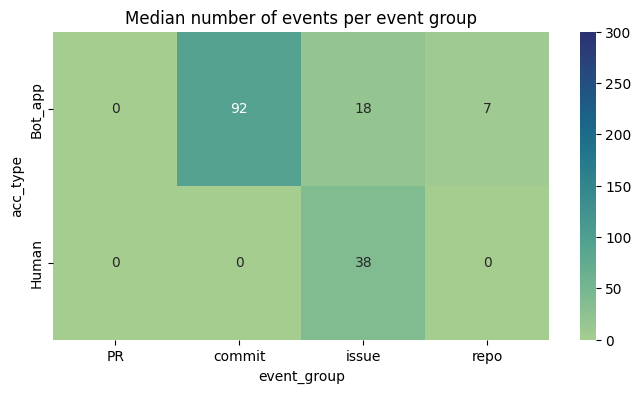

In [ ]:


df_medians_pivot = df_medians.pivot(index='acc_type', columns='event_group', values='median')

print(df_medians_pivot)
plt.figure(figsize=(8, 4))
sns.heatmap(df_medians_pivot, annot=True, vmin=0, vmax=300, cmap="crest")
plt.title("Median number of events per event group")
plt.show()


#### What is the difference that you observe between Bots+Bot actors and Humans?

In [ ]:
#Bots+Bot actors concentrate their activity on commits, with a very high volume in that category, reflecting automated and intensive behavior. In contrast, Humans stand out with a more focused activity on issues, suggesting a more selective and collaborative approach to managing project problems.

#### What is the differnce that you observe between Event groups?

In [ ]:
#Each event group reflects a specific aspect of repository activity. For example:

#The "commit" group shows very intense activity among Bots, indicating highly automated behavior.
#The "issue" group is much more prevalent among Humans, suggesting that they primarily engage in managing and discussing problems.
#The "PR" and "repo" groups exhibit lower medians for both types of actors, indicating that they are less frequently involved in these categories.

#### What is the difference that you observe between Bots+Bot actors and Humans and Event groups all considering at the same time?

In [ ]:
#Bots+Bot actors perform a significantly higher number of commits (92) and some actions on issues and the repository, while Humans primarily focus on issues (38) and have almost no activity in other groups (0 for PR, commit, and repo). Thus, Bots+Bot actors concentrate on more automated, large-scale tasks (commits), whereas Humans are more involved in resolving and discussing issues.

### Question 3

#### Create boxen plots to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/generated/seaborn.boxenplot.html#seaborn.boxenplot 
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

C:\Users\arian\AppData\Local\Temp\ipykernel_27916\1766765197.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


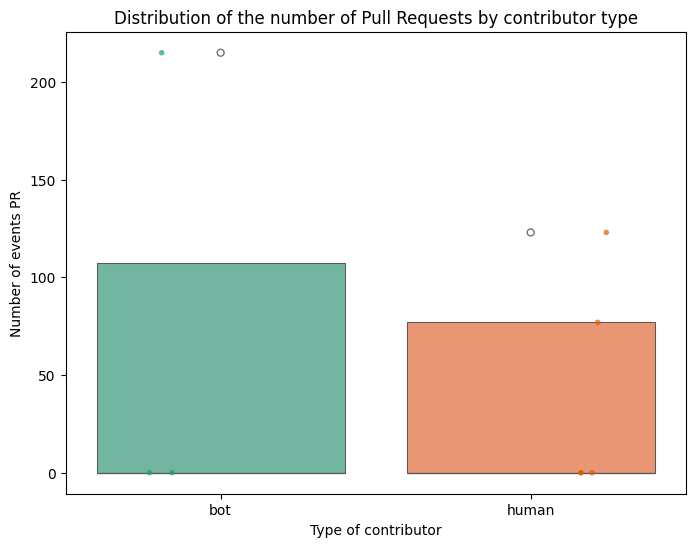

In [ ]:
# YOUR CODE BELOW - Visualize number of events from pull request event group

plt.figure(figsize=(8, 6))
sns.boxenplot(
    data=final_events_df, 
    x='acc_type',     
    y='PR',           
    palette='Set2',   
    width=0.8,        
)
plt.title('Distribution of the number of Pull Requests by contributor type')


sns.stripplot(
    data=final_events_df,
    x='acc_type',
    y='PR',
    hue='acc_type',       
    dodge=True,           
    palette='Dark2',
    size=4,               
    alpha=0.7             
)
plt.legend([],[], frameon=False)  

plt.ylabel('Number of events PR')
plt.xlabel('Type of contributor')
plt.show()



C:\Users\arian\AppData\Local\Temp\ipykernel_27916\845316273.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


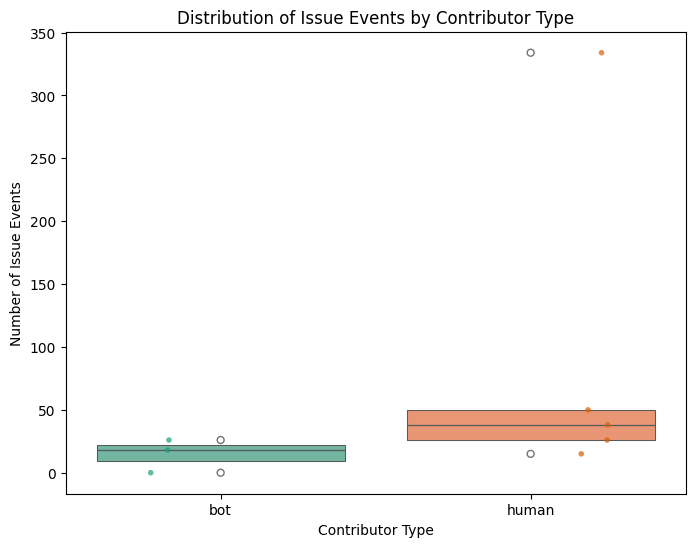

In [ ]:
# 1) Create a boxenplot to show the distribution of "Issue" events by contributor type
plt.figure(figsize=(8, 6))
sns.boxenplot(
    data=final_events_df, 
    x='acc_type',     # Categorical variable (Bot/Human) on the x-axis
    y='issue',        # Numerical variable (number of Issue events) on the y-axis
    palette='Set2',
    width=0.8,
)
plt.title('Distribution of Issue Events by Contributor Type')

# 2) Add a stripplot to highlight individual data points, 
#    and optionally color them differently for bots
sns.stripplot(
    data=final_events_df,
    x='acc_type',
    y='issue',
    hue='acc_type',    # If you'd like to further distinguish points by type
    dodge=True,
    palette='Dark2',
    size=4,
    alpha=0.7
)
plt.legend([],[], frameon=False)  # Remove redundant legend

plt.ylabel('Number of Issue Events')
plt.xlabel('Contributor Type')
plt.show()

C:\Users\arian\AppData\Local\Temp\ipykernel_27916\1535603957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


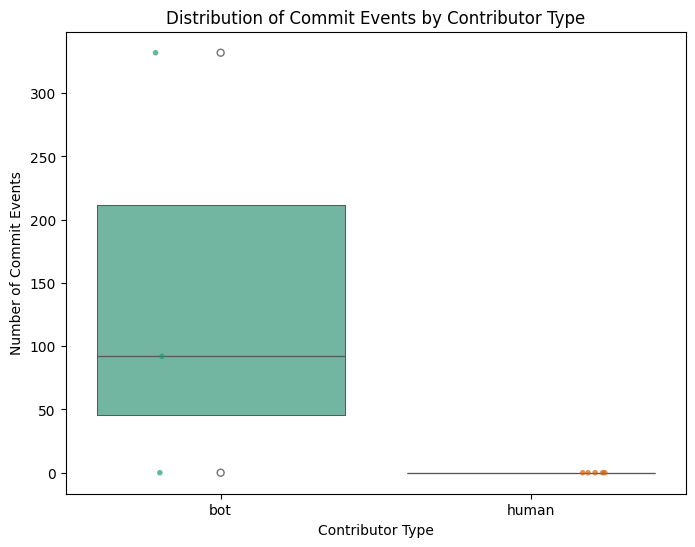

In [ ]:
# YOUR CODE BELOW - Visualise number of events from commit event group
# 1) Create a boxenplot to display the distribution of "commit" events by contributor type
plt.figure(figsize=(8, 6))
sns.boxenplot(
    data=final_events_df, 
    x='acc_type',  # Categorical variable (Bot/Human) on the x-axis
    y='commit',    # Numerical variable (number of commit events) on the y-axis
    palette='Set2',
    width=0.8
)
plt.title('Distribution of Commit Events by Contributor Type')

# 2) Add a stripplot to highlight individual data points, 
#    optionally coloring them differently for bots
sns.stripplot(
    data=final_events_df,
    x='acc_type',
    y='commit',
    hue='acc_type',  # If you'd like to further distinguish points by type
    dodge=True,
    palette='Dark2',
    size=4,
    alpha=0.7
)

# Remove redundant legend
plt.legend([], [], frameon=False)

plt.xlabel('Contributor Type')
plt.ylabel('Number of Commit Events')
plt.show()

C:\Users\arian\AppData\Local\Temp\ipykernel_27916\198903734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


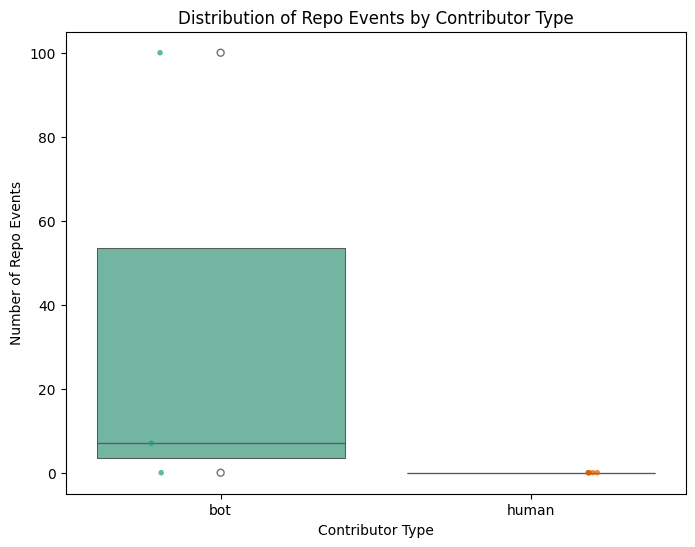

In [ ]:
# 1) Create a boxenplot to display the distribution of "repo" events by contributor type
plt.figure(figsize=(8, 6))
sns.boxenplot(
    data=final_events_df,
    x='acc_type',   # Contributor type on the x-axis
    y='repo',       # Number of repo events on the y-axis
    palette='Set2',
    width=0.8
)
plt.title('Distribution of Repo Events by Contributor Type')

# 2) Add a stripplot to highlight individual data points
sns.stripplot(
    data=final_events_df,
    x='acc_type',
    y='repo',
    hue='acc_type',   # Color points by contributor type
    dodge=True,
    palette='Dark2',
    size=4,
    alpha=0.7
)

# Remove redundant legend
plt.legend([], [], frameon=False)

plt.xlabel('Contributor Type')
plt.ylabel('Number of Repo Events')
plt.show()

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [ ]:
import scipy.stats as stats

# List of event group columns in your final_events_df DataFrame
event_groups = ['PR', 'commit', 'issue', 'repo']

# Loop through each event group and perform the Shapiro-Wilk test
for group in event_groups:
    # Extract the data for the current event group
    data = final_events_df[group].values
    
    # Perform the Shapiro-Wilk test
    stat, p_value = stats.shapiro(data)
    
    print(f"For event group '{group}':")
    print(f"  Shapiro-Wilk test statistic = {stat:.4f}")
    print(f"  p-value = {p_value:.4f}")
    
    # Determine whether to reject the null hypothesis based on p-value
    if p_value < 0.05:
        print("  => Reject the null hypothesis: The data does not appear to be normally distributed.\n")
    else:
        print("  => Fail to reject the null hypothesis: The data appears to be normally distributed.\n")


For event group 'PR':
  Shapiro-Wilk test statistic = 0.5253
  p-value = 0.0000
  => Reject the null hypothesis: The data does not appear to be normally distributed.

For event group 'commit':
  Shapiro-Wilk test statistic = 0.4334
  p-value = 0.0000
  => Reject the null hypothesis: The data does not appear to be normally distributed.

For event group 'issue':
  Shapiro-Wilk test statistic = 0.4481
  p-value = 0.0000
  => Reject the null hypothesis: The data does not appear to be normally distributed.

For event group 'repo':
  Shapiro-Wilk test statistic = 0.3362
  p-value = 0.0000
  => Reject the null hypothesis: The data does not appear to be normally distributed.



### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [ ]:
# YOUR CODE BELOW
import itertools
import scipy.stats as stats

# Define the event group names (as in final_events_df)
event_groups = ['PR', 'commit', 'issue', 'repo']

# Loop through all unique pairs of event groups
for group1, group2 in itertools.combinations(event_groups, 2):
    data1 = final_events_df[group1].values
    data2 = final_events_df[group2].values

    # Perform Shapiro-Wilk tests for normality on each group
    stat1, p1 = stats.shapiro(data1)
    stat2, p2 = stats.shapiro(data2)

    # Decide which test to use:
    # If at least one of the groups is not normally distributed, use Mann-Whitney U test.
    if p1 < 0.05 or p2 < 0.05:
        test_used = "Mann-Whitney U test"
        u_stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided', method='exact', nan_policy='omit')
    else:
        test_used = "Independent t-test"
        t_stat, p_value = stats.ttest_ind(data1, data2, alternative='two-sided', nan_policy='omit')
    
    print(f"Comparison between '{group1}' and '{group2}' using {test_used}:")
    print(f"  p-value = {p_value:.4f}")
    if p_value < 0.01:
        print("  => Reject the null hypothesis: The distributions differ significantly.\n")
    else:
        print("  => Fail to reject the null hypothesis: No significant difference between the distributions.\n")



Comparison between 'PR' and 'commit' using Mann-Whitney U test:
  p-value = 0.1206
  => Fail to reject the null hypothesis: No significant difference between the distributions.

Comparison between 'PR' and 'issue' using Mann-Whitney U test:
  p-value = 0.0444
  => Fail to reject the null hypothesis: No significant difference between the distributions.

Comparison between 'PR' and 'repo' using Mann-Whitney U test:
  p-value = 0.0080
  => Reject the null hypothesis: The distributions differ significantly.

Comparison between 'commit' and 'issue' using Mann-Whitney U test:
  p-value = 0.0002
  => Reject the null hypothesis: The distributions differ significantly.

Comparison between 'commit' and 'repo' using Mann-Whitney U test:
  p-value = 0.4073
  => Fail to reject the null hypothesis: No significant difference between the distributions.

Comparison between 'issue' and 'repo' using Mann-Whitney U test:
  p-value = 0.0000
  => Reject the null hypothesis: The distributions differ signific

### Question 4.3
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values, list of values). This will return the effect size.
#### Refer to the table given in the TP document and mention your interpretation (negligible, small, medium, large).

In [ ]:
import itertools
import scipy.stats as stats
import cliffsDelta  # Ensure this module is available

# Define common thresholds for Cliff's delta interpretation:
def classify_delta(delta):
    # Using common thresholds:
    # negligible: |delta| < 0.147
    # small:      0.147 <= |delta| < 0.33
    # medium:     0.33 <= |delta| < 0.474
    # large:      |delta| >= 0.474
    ad = abs(delta)
    if ad < 0.147:
        return 'negligible'
    elif ad < 0.33:
        return 'small'
    elif ad < 0.474:
        return 'medium'
    else:
        return 'large'

# List of event group names in your final_events_df DataFrame
event_groups = ['PR', 'commit', 'issue', 'repo']

# Loop through all unique pairs of event groups
for group1, group2 in itertools.combinations(event_groups, 2):
    data1 = final_events_df[group1].values
    data2 = final_events_df[group2].values

    # Perform Shapiro-Wilk tests for normality on each group
    stat1, p1 = stats.shapiro(data1)
    stat2, p2 = stats.shapiro(data2)

    # Decide which test to use:
    # If at least one of the groups is not normally distributed, use Mann-Whitney U test.
    if p1 < 0.05 or p2 < 0.05:
        test_used = "Mann-Whitney U test"
        u_stat, p_value = stats.mannwhitneyu(data1, data2, alternative='two-sided', method='exact', nan_policy='omit')
    else:
        test_used = "Independent t-test"
        t_stat, p_value = stats.ttest_ind(data1, data2, alternative='two-sided', nan_policy='omit')
    
    print(f"Comparison between '{group1}' and '{group2}' using {test_used}:")
    print(f"  p-value = {p_value:.4f}")

    # Use a significance threshold of 0.01
    if p_value < 0.01:
        print("  => Reject the null hypothesis: The distributions differ significantly.")
        # Calculate Cliff's delta (effect size)
        delta = cliffsDelta.cliffsDelta(data1.tolist(), data2.tolist())
        magnitude = classify_delta(delta)
        print(f"  Cliff's delta = {delta:.4f} ({magnitude})\n")
    else:
        print("  => Fail to reject the null hypothesis: No significant difference between the distributions.\n")


Comparison between 'PR' and 'commit' using Mann-Whitney U test:
  p-value = 0.1206
  => Fail to reject the null hypothesis: No significant difference between the distributions.

Comparison between 'PR' and 'issue' using Mann-Whitney U test:
  p-value = 0.0444
  => Fail to reject the null hypothesis: No significant difference between the distributions.

Comparison between 'PR' and 'repo' using Mann-Whitney U test:
  p-value = 0.0080
  => Reject the null hypothesis: The distributions differ significantly.
  Cliff's delta = 0.3431 (medium)

Comparison between 'commit' and 'issue' using Mann-Whitney U test:
  p-value = 0.0002
  => Reject the null hypothesis: The distributions differ significantly.
  Cliff's delta = -0.4744 (large)

Comparison between 'commit' and 'repo' using Mann-Whitney U test:
  p-value = 0.4073
  => Fail to reject the null hypothesis: No significant difference between the distributions.

Comparison between 'issue' and 'repo' using Mann-Whitney U test:
  p-value = 0.000